<a href="https://colab.research.google.com/github/vjbarayuga/Week8-Boosting_Models/blob/main/TitanicGradientBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
# Neural Network
import keras 
from keras.models import Sequential 
from keras.layers import Dense

In [ ]:
#download the titanic dataset here (https://www.kaggle.com/c/titanic/data)
train = pd.read_csv('/content/drive/MyDrive/Coding_DOJO-Data_Science_Bootcamp/03_Machine_Learning_Data_Science/04_Boosting_Models/Titanic Dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Coding_DOJO-Data_Science_Bootcamp/03_Machine_Learning_Data_Science/04_Boosting_Models/Titanic Dataset/test.csv')

In [ ]:
combined = pd.concat([train.drop('Survived',axis=1),test])

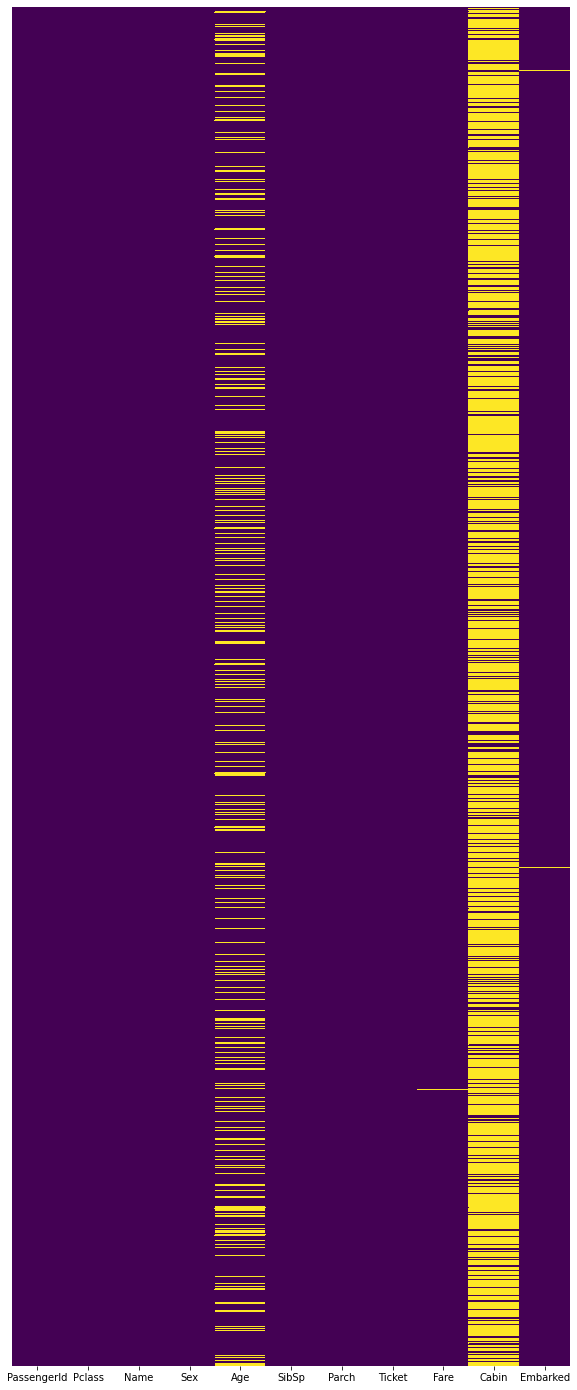

In [ ]:
#For iPython
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,25))
sns.heatmap(combined.isnull(),cmap="viridis",yticklabels=False,cbar=False)

In [ ]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [ ]:
train['Age'].fillna(train['Age'].median(),inplace=True) # Imputing Missing Age Values
train['Embarked'].fillna(train['Embarked'].value_counts().index[0], inplace=True) # Imputing Missing Embarked Values
d = {1:'1st',2:'2nd',3:'3rd'} #Creating a dictionary to convert Passenger Class from 1,2,3 to 1st,2nd,3rd.
train['Pclass'] = train['Pclass'].map(d) #Mapping the column based on the dictionary
train.drop(['PassengerId','Name','Ticket','Cabin'], 1, inplace=True) # Dropping Unnecessary Columns
categorical_vars = train[['Pclass','Sex','Embarked']] # Getting Dummies of Categorical Variables
dummies = pd.get_dummies(categorical_vars,drop_first=True)
train = train.drop(['Pclass','Sex','Embarked'],axis=1) #Dropping the Original Categorical Variables to avoid duplicates
train = pd.concat([train,dummies],axis=1) #Now, concat the new dummy variables
train.head() #Check the clean version of the train data.

,Survived,Age,SibSp,Parch,Fare,Pclass_2nd,Pclass_3rd,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


# SPLIT THE DATASET

In [ ]:
# Splitting Features and Label
y = train['Survived']
X = train.drop(['Survived'],1)

#Using Train Test Split from Sklearn to Split Our Train Dataset into Train and Testing Datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(learning_rate=0.1,max_depth=3)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# GRADIENT BOOST

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[134  31]
 [ 27  76]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       165
           1       0.71      0.74      0.72       103

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.79      0.78      0.78       268



In [ ]:
test['Age'].fillna(test['Age'].median(),inplace=True) # Age
test['Fare'].fillna(test['Fare'].median(),inplace=True) # Fare
d = {1:'1st',2:'2nd',3:'3rd'} #Pclass
test['Pclass'] = test['Pclass'].map(d)
test['Embarked'].fillna(test['Embarked'].value_counts().index[0], inplace=True) # Embarked
ids = test[['PassengerId']]# Passenger Ids
test.drop(['PassengerId','Name','Ticket','Cabin'],1,inplace=True)# Drop Unnecessary Columns
categorical_vars = test[['Pclass','Sex','Embarked']]# Get Dummies of Categorical Variables
dummies = pd.get_dummies(categorical_vars,drop_first=True)
test = test.drop(['Pclass','Sex','Embarked'],axis=1)#Drop the Original Categorical Variables
test = pd.concat([test,dummies],axis=1)#Instead, concat the new dummy variables
#test.head()

In [ ]:
preds = model.predict(test)
results = ids.assign(Survived=preds)
results.to_csv('/content/drive/MyDrive/Coding_DOJO-Data_Science_Bootcamp/03_Machine_Learning_Data_Science/04_Boosting_Models/Titanic Dataset/titanic_submission.csv',index=False)